# Random Networks

Будем рассматривать случайные графы Эрдёша-Реньи.

In [2]:
import networkx as nx
from math import factorial, e
from collections import Counter
from operator import add
from functools import reduce
from rnets import gen_random_graph_with_degree_dist

import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

def get_node_degree_theoretical_dist(N, max_deg):
    return [N * 1.0 / (factorial(k) * e) for k in range(max_deg + 1)]


def review_with_aggregation(N, p, nsamples):
    if nsamples == 1:
        G, counter = gen_random_graph_with_degree_dist(N, p)
    else:
        counter = reduce(add, map(lambda _: gen_random_graph_with_degree_dist(N, p)[1], range(nsamples)))
    deg, count = zip(*sorted(counter.items()))
    count = [float(x) / nsamples for x in count]
    th_count = get_node_degree_theoretical_dist(N, max(deg))
    print(f"Degree distribution: {list(zip(deg, count))}")

    fig, ax = plt.subplots(figsize=(12, 7))
    plt.bar(deg, count, width=0.8, color='orange', label="generated", alpha=0.5)
    plt.bar(range(max(deg) + 1), th_count, width=0.8, color='blue', label='theoretical', alpha=0.5)

    plt.title(f"Degree histogram for aggregated {nsamples=}")
    plt.xlabel('degree')
    plt.ylabel('count')
    plt.legend()
    ax.set_xticks([d + 0.4 for d in deg])
    ax.set_xticklabels(deg)

    if nsamples == 1:
        plt.axes([0.5, 0.5, 0.4, 0.4])
        Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
        pos = nx.spring_layout(G)
        plt.axis("off")
        nx.draw_networkx_nodes(G, pos, node_size=10, node_color='red')
        nx.draw_networkx_edges(G, pos, alpha=0.4)


## 1. Моделирование распределения вершин в случайном графе

Рассмотрим, как меняется распределение вершин по степеням
* Для разных $k = p(N - 1)$
* Для разных размеров наборов графов, из которых строятся агрегированные распредения

### $k = 1$

In [3]:
N = 101
k = 1
p = k * 1. / (N - 1)

Degree distribution: [(0, 44.0), (1, 33.0), (2, 19.0), (3, 5.0)]


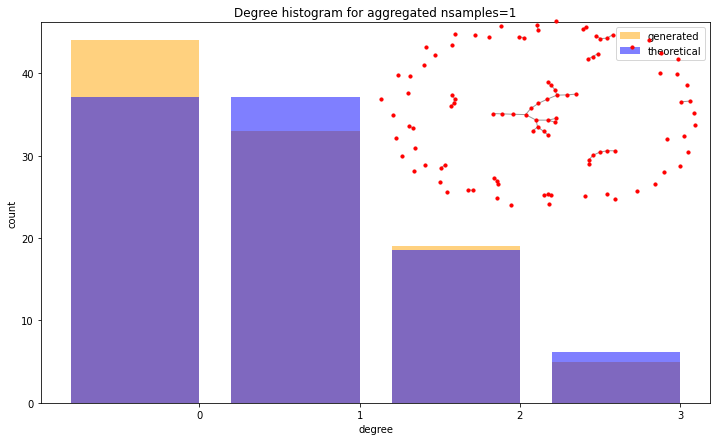

In [4]:
review_with_aggregation(N, p, 1)

Degree distribution: [(0, 37.33), (1, 36.69), (2, 18.77), (3, 6.16), (4, 1.64), (5, 0.32), (6, 0.08), (7, 0.01)]


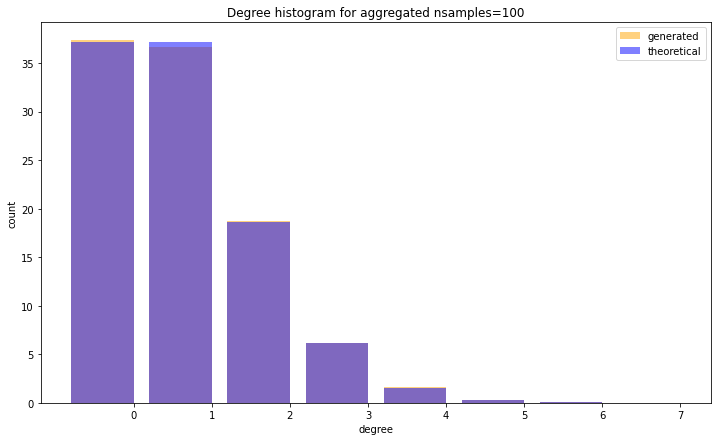

In [5]:
review_with_aggregation(N, p, 100)

Degree distribution: [(0, 37.016), (1, 37.379), (2, 18.526), (3, 6.202), (4, 1.542), (5, 0.274), (6, 0.051), (7, 0.009), (8, 0.001)]


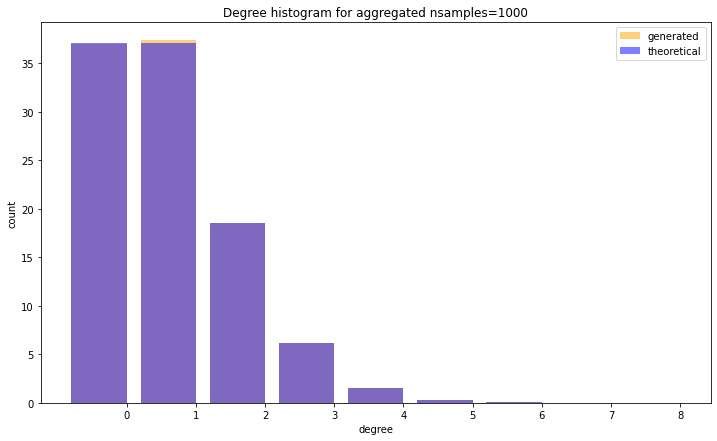

In [6]:
review_with_aggregation(N, p, 1000)

Мы видим, что полученные распределения крайне похожи на теоретические, а аггрегация только улучшает показатель близости.

### $k = 2$

In [7]:
N = 101
k = 2
p = k * 1. / (N - 1)

Degree distribution: [(0, 17.0), (1, 24.0), (2, 29.0), (3, 15.0), (4, 11.0), (5, 4.0), (7, 1.0)]


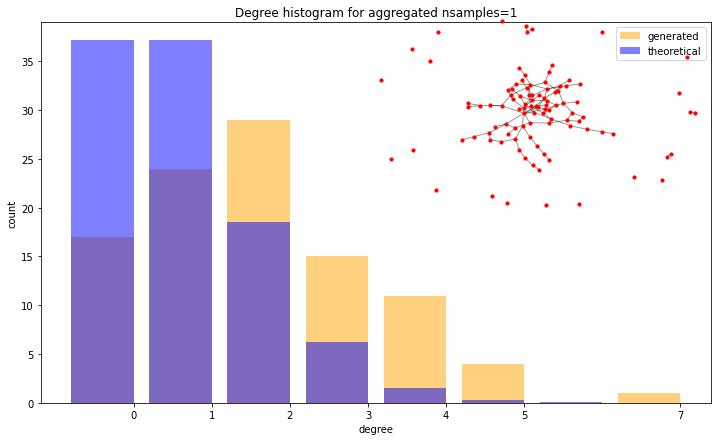

In [8]:
review_with_aggregation(N, p, 1)

Degree distribution: [(0, 13.24), (1, 27.24), (2, 27.76), (3, 18.38), (4, 9.09), (5, 3.71), (6, 1.16), (7, 0.33), (8, 0.06), (9, 0.02), (10, 0.01)]


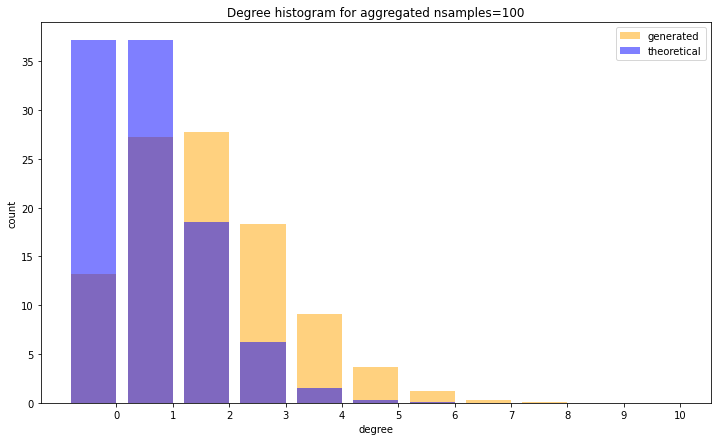

In [9]:
review_with_aggregation(N, p, 100)

Degree distribution: [(0, 13.383), (1, 27.391), (2, 27.651), (3, 18.309), (4, 9.062), (5, 3.589), (6, 1.171), (7, 0.337), (8, 0.087), (9, 0.011), (10, 0.006), (11, 0.003)]


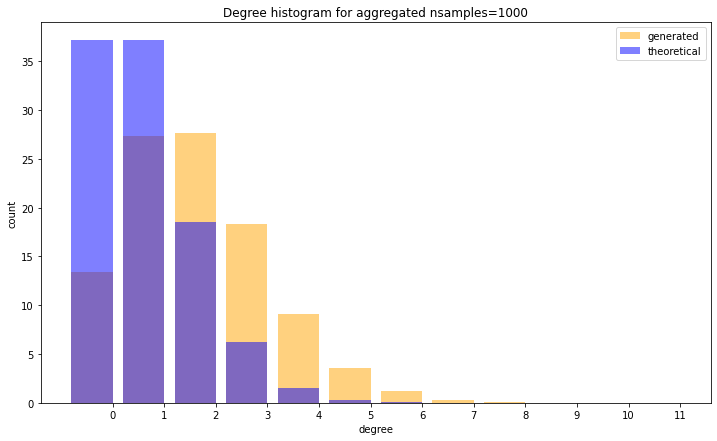

In [10]:
review_with_aggregation(N, p, 1000)

### $k = 3$

In [11]:
N = 101
k = 3
p = k * 1. / (N - 1)

Degree distribution: [(0, 7.0), (1, 20.0), (2, 19.0), (3, 25.0), (4, 15.0), (5, 13.0), (6, 2.0)]


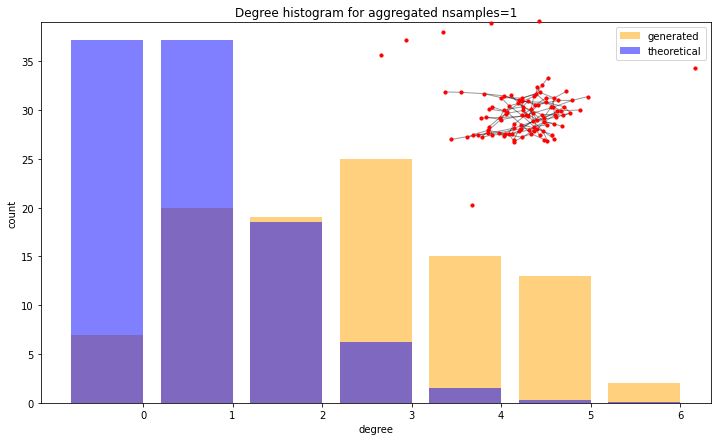

In [12]:
review_with_aggregation(N, p, 1)

Degree distribution: [(0, 4.36), (1, 14.69), (2, 22.45), (3, 23.01), (4, 17.59), (5, 10.54), (6, 5.28), (7, 2.06), (8, 0.78), (9, 0.19), (10, 0.04), (11, 0.01)]


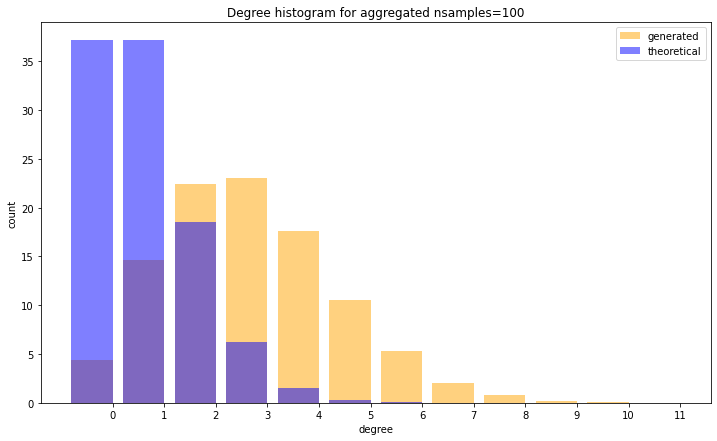

In [13]:
review_with_aggregation(N, p, 100)

Degree distribution: [(0, 4.897), (1, 14.951), (2, 22.724), (3, 22.963), (4, 17.269), (5, 10.159), (6, 5.037), (7, 2.011), (8, 0.689), (9, 0.21), (10, 0.069), (11, 0.015), (12, 0.005), (13, 0.001)]


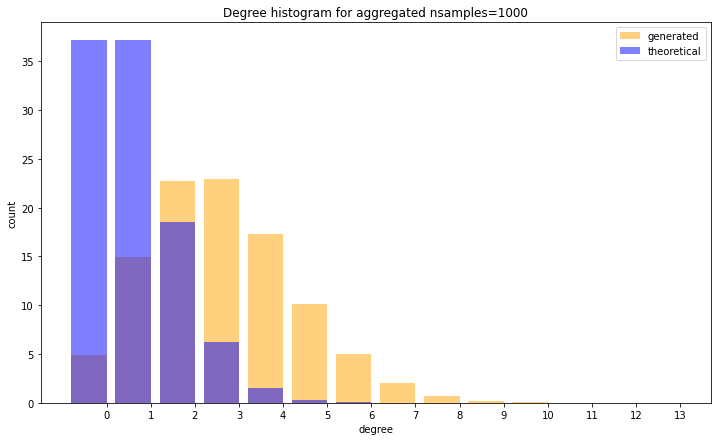

In [14]:
review_with_aggregation(N, p, 1000)

Для $k = 2$ и $k = 3$ мы замечаем значительную расходимость с теоретическими соображениями.
Это может исходить из следующих соображений:
* Я использовал формулу теоретического распределения, не учитывающего $k$. Скорее всего, её можно вывести, но вот не успел.
* С ростом $k$ растёт и связность отдельных компонент графа, что видно на первых графиках для каждого $k$.
Таким образом, для $k = 2$ и $k = 3$ число вершин, не имеющих связей или имеющих лишь одну, не столь велико.
А значит, различные генерации сильнее отличаются в степенях отдельных першин. Таким образом, агрегация выступает инструментом сглаживания.

## Задание 2

Посмотрим на распределения связных компонент по размеру в зависимости от различных $k$.

(Я делал не как гистограммы, потому что, как по мне, так более понятно)

$k = 0.5$

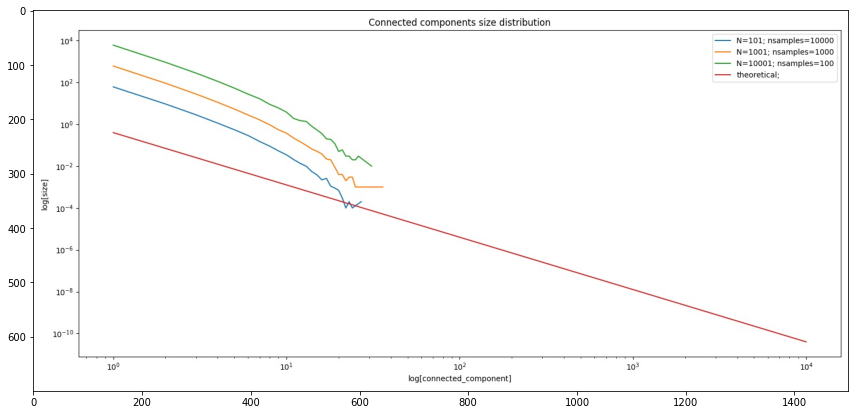

In [15]:
plt.figure(figsize=(15, 7))
img = imread("images/2_k=0.5.jpg")
plt.imshow(img)

Динамика близка к теоретической, гигантской компоненты не наблюдается.

$k = 0.9$

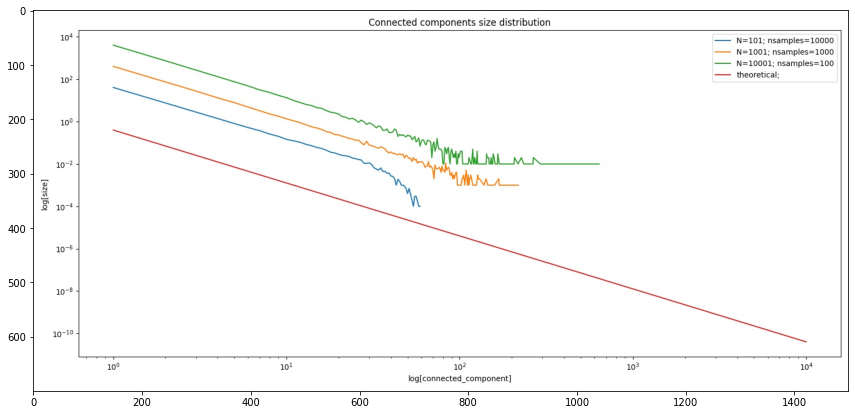

In [16]:
plt.figure(figsize=(15, 7))
img = imread("images/2_k=0.9.jpg")
plt.imshow(img)

Заметно появление крупных кластеров, но крайне мало. Для большого графа динамика стала расходиться с теоретической на хвостах.

$k = 0.98$

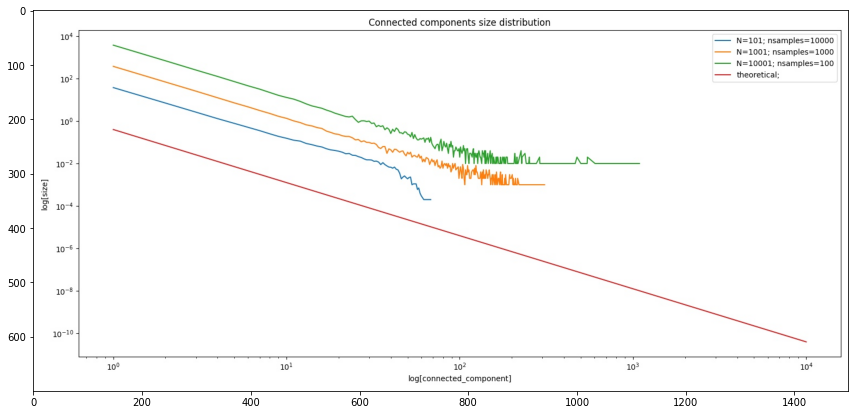

In [17]:
plt.figure(figsize=(15, 7))
img = imread("images/2_k=0.98.jpg")
plt.imshow(img)

На большом графе 2 самых большиъ кластера значительно оторвались от других, динамика среднего графа стала расходиться с теоретической на хвостах.

$k = 1$

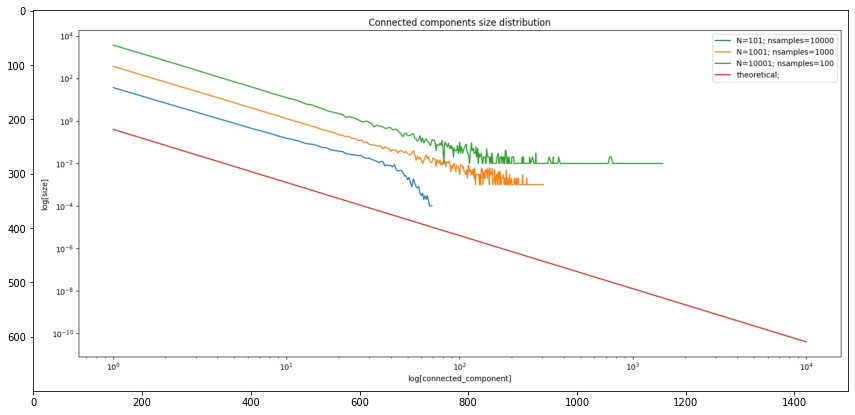

In [18]:
plt.figure(figsize=(15, 7))
img = imread("images/2_k=1.0.jpg")
plt.imshow(img)

Два кластера на большом графе слились в гигантский кластер.

$k = 1.02$

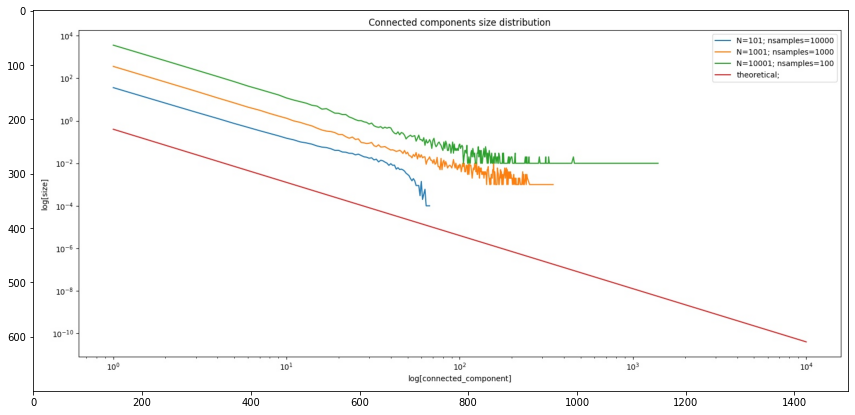

In [19]:
plt.figure(figsize=(15, 7))
img = imread("images/2_k=1.02.jpg")
plt.imshow(img)

Значимых изменений по сравнению с предыдущим нет.

$k = 1.1$

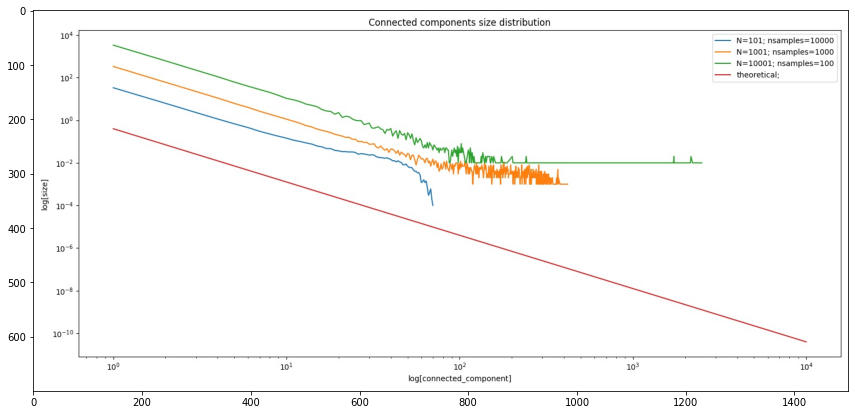

In [20]:
plt.figure(figsize=(15, 7))
img = imread("images/2_k=1.1.jpg")
plt.imshow(img)

* На большом графе гигантские кластеры резко выросли в размерах
* Участилось число степеней вывсокой размерности в среднем графе
* Малый граф стал отколняться от теоретической динамики

$k = 2$

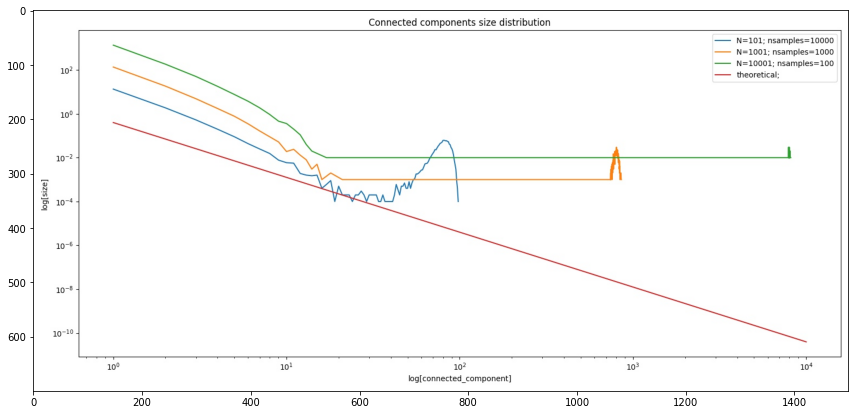

In [21]:
plt.figure(figsize=(15, 7))
img = imread("images/2_k=2.0.jpg")
plt.imshow(img)

Крайне явное формирование единой гигантской компоненты вля всех графов.

Так же, дополнительно отмечу, что аггрегирование опять выполняет функцию сглаживания.
Мы можем это проследить на том, что малый граф с сильным агрегированием гасит все выбросы в виде большиъ кластеров в то время как для слабо-агрегированного большого графа выбросы почти не демпфируются.

### 3. Посмотрим на динамику максимальной связной компоненты

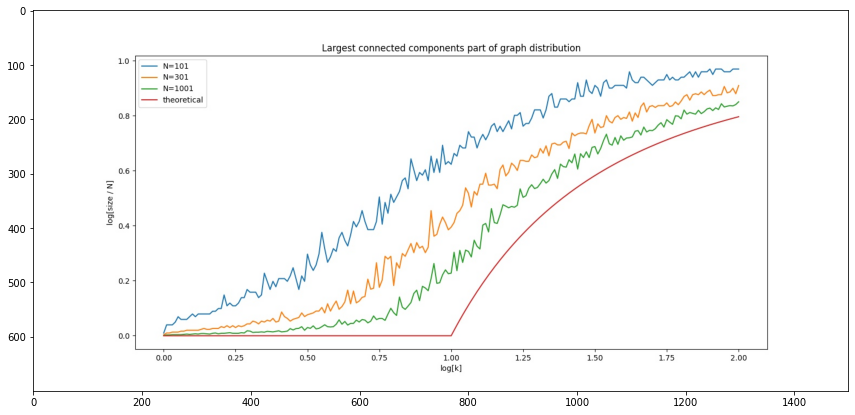

In [22]:
plt.figure(figsize=(15, 7))
img = imread("images/3.jpg")
plt.imshow(img)

(Оси, на самом деле, не логарифмические, а обычные. Только график больно долго пересчитывается)

Можем наблюдать, что при увеличении $N$, растёт и близость численного моделлирования к теоретического.
Что и не удивительно, ведь теоретическая выводится при $N \rightarrow +\infty$.

### 4. Доля графа без цикла

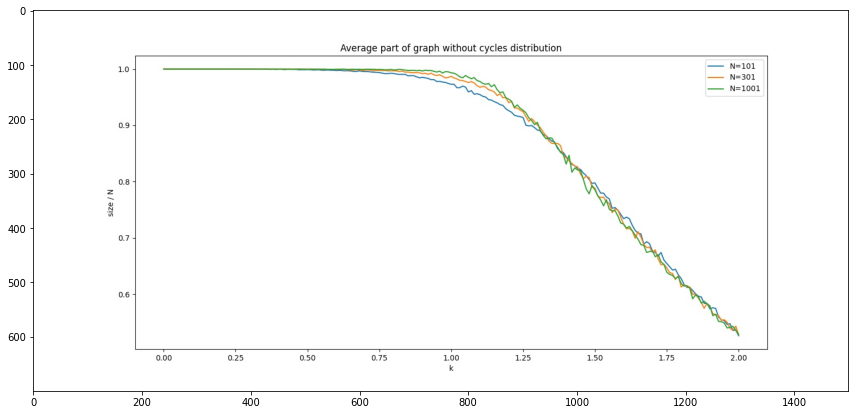

In [23]:
plt.figure(figsize=(15, 7))
img = imread("images/4.jpg")
plt.imshow(img)

Как мы видим, доля графа без циклов не зависит от $N$.

Можно, кстати, проверить теорему что при $\frac{\ln N}{N}$ число изолированных узлов будет крайне мало $\Rightarrow$ доля без циклов соответственно.

$\frac{\ln 1001}{1001} \approx 0.007$

In [25]:
from rnets import get_average_part_of_graph_without_cycles

get_average_part_of_graph_without_cycles(1001, 7, 10)

0.006293706293706293

Да, доля изолированных узлов упала к этому моменту.
